In [1]:
#Oberservations:
# 1. Rural rides are typically more expensive relative to Urban rides, although urban rides occur more often. 
# 2. Suburban rides occur more often compared to Rural and control the middle of the market in terms of rides and average fairs.
# 3. If drivers want to increase their ridership, the data says they would need to drive to the closest Urban or Suburban city.


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(city_data, ride_data, on ="city")

# Display the data table for preview
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
# Merge Data by Avg City Fair
average_city_fair = merge_data.groupby("city")


In [4]:
# Average Fare ($) Per City
avg_fare = average_city_fair.mean()['fare']

In [5]:
# Total Number of Rides Per City
ride_count = average_city_fair['ride_id'].count()

In [6]:
# Total Number of Drivers Per City
driver_count = average_city_fair.mean()['driver_count']

In [7]:
# City Type (Urban, Suburban, Rural)
city_type = city_data.set_index('city')['type']


In [8]:
#Creating a DataFrame to use it for Bubble Plot
city_info = pd.DataFrame({"Average Fare": avg_fare,
                          "Total Rides": ride_count,
                          "Total Drivers": driver_count,
                          "City Type": city_type})
city_info.head()


,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12.0,Urban
Barajasview,25.332273,22,26.0,Urban
Barronchester,36.422500,16,11.0,Suburban
Bethanyland,32.956111,18,22.0,Suburban
Bradshawfurt,40.064000,10,7.0,Rural


## Bubble Plot of Ride Sharing Data

Text(4, 50, 'Note: Circle Size correlates with driver count per City')

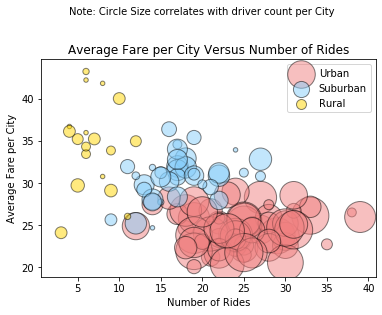

In [9]:
# Obtain the x and y coordinates for each of the three city types
urban = city_info.loc[city_info["City Type"]=="Urban"]
suburban = city_info.loc[city_info["City Type"]=="Suburban"]
rural = city_info.loc[city_info["City Type"]=="Rural"]

# Build the scatter plots for each city types

plt.scatter(urban["Total Rides"], urban["Average Fare"], color ="lightcoral",edgecolors = "black",s= urban["Total Drivers"]*20, label = "Urban", alpha = 0.5)
plt.scatter(suburban["Total Rides"], suburban["Average Fare"],color = "lightskyblue",edgecolors = "black",s= suburban["Total Drivers"]*20, label = "Suburban", alpha = 0.5)
plt.scatter(rural["Total Rides"], rural["Average Fare"], color = "gold",edgecolors = "black",s= rural["Total Drivers"]*20,label = "Rural",alpha = 0.5)
# Incorporate the other graph properties

# Create a legend
plt.legend(loc = "upper right")

# Incorporate a text label regarding circle size
plt.title("Average Fare per City Versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare per City")
plt.text(4,50,"Note: Circle Size correlates with driver count per City")



In [10]:
# Show plot
plt.show()

## Total Fares by City Type

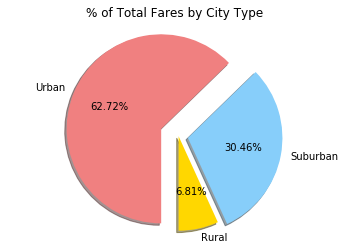

In [14]:
# Calculate Type Percents
city_fare_pie = merge_data.groupby(["type"])["fare"].sum()
city_fare_pie

# Build Pie Chart
labels = city_fare_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0.1,0.2)

plt.pie(city_fare_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.savefig("Images/CityFares.png")
plt.show()



## Total Rides by City Type

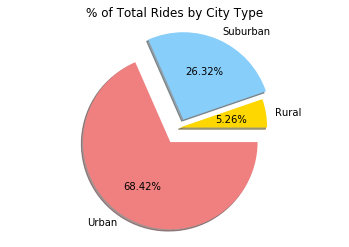

In [12]:
# Calculate Ride Percents
city_rides_pie = merge_data.groupby(["type"])["ride_id"].count()
city_rides_pie

# Build Pie Chart
labels = city_rides_pie.index
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0.1,0.2)
#plt.pie(city_fare_pie, labels= city_fare_pie.index, autopct = "")
plt.pie(city_rides_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("Images/CityRides.png")
plt.show()


## Total Drivers by City Type

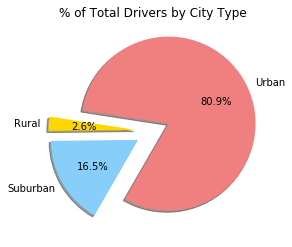

In [13]:
# Calculate Driver Percents

total_combined_drivers = city_data.driver_count.sum()

# Drivers per type & Divide By All Drivers
urban_driver_percent = city_data[city_data["type"] == "Urban"].driver_count.sum() / total_combined_drivers * 100
suburban_driver_percent = city_data[city_data["type"] == "Suburban"].driver_count.sum() / total_combined_drivers * 100
rural_driver_percent = city_data[city_data["type"] == "Rural"].driver_count.sum() / total_combined_drivers * 100

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
driving_types = ["Urban", "Rural", "Suburban"]
driving_percentages = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.2,0.2,0.2)
plt.pie(driving_percentages, explode=explode, labels=driving_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=240)

# Save Figure
plt.savefig("Images/DriversCityType.png")

# Show Figure
plt.show()
